In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
data = pd.read_csv('credit_risk_dataset.csv')

In [ ]:
data.shape

(32581, 12)

In [ ]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean')
data['person_emp_length'] = imputer.fit_transform(data[['person_emp_length']])
data['loan_int_rate'] = imputer.fit_transform(data[['loan_int_rate']])
#Handling missing values

In [ ]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [ ]:
# Normalize
scaler = StandardScaler()
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

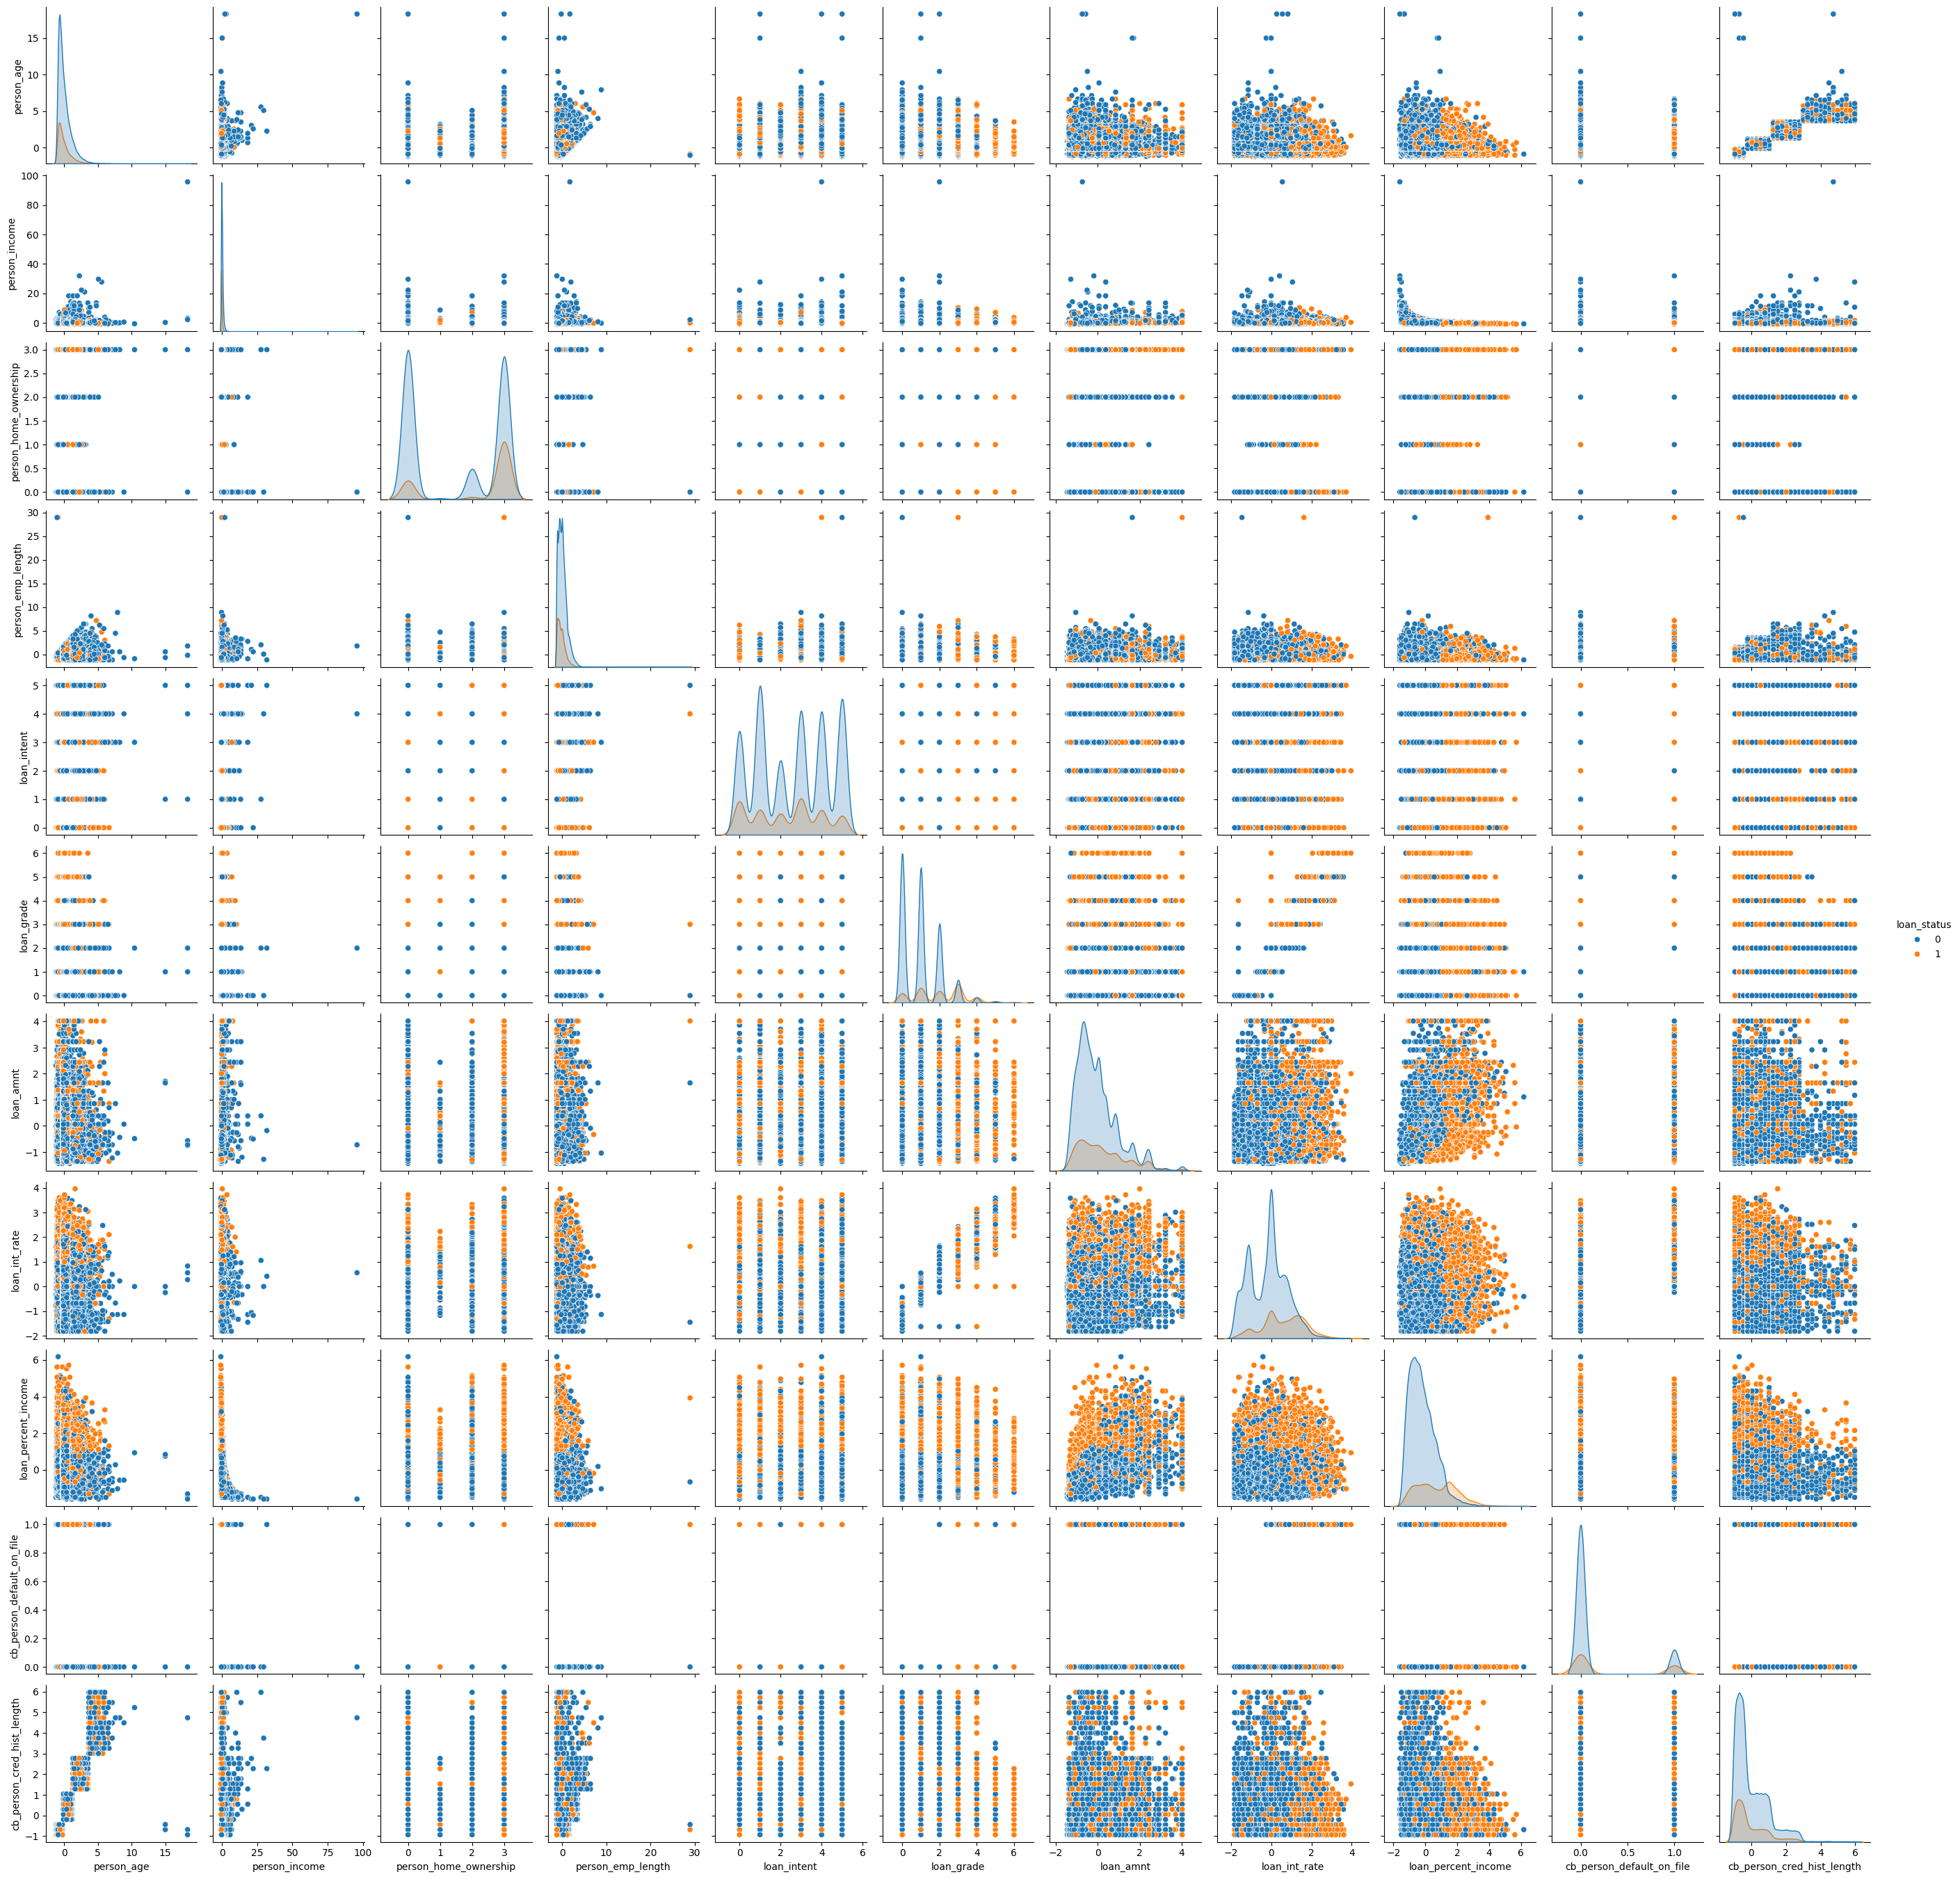

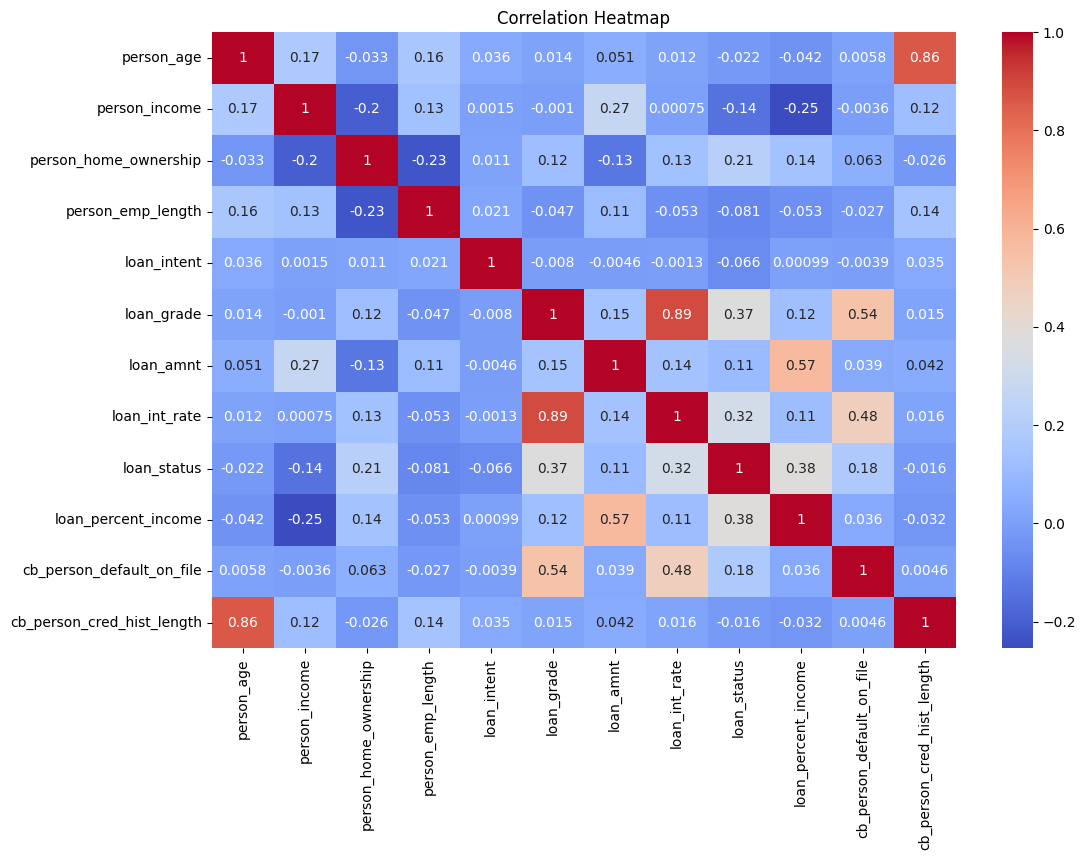

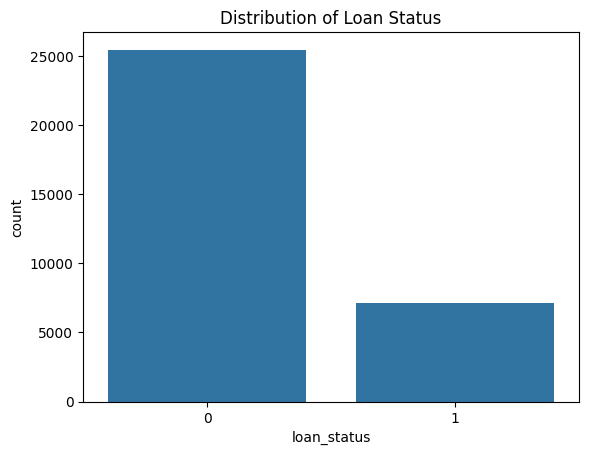

In [ ]:
# Data Visualization
sns.pairplot(data, hue='loan_status')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

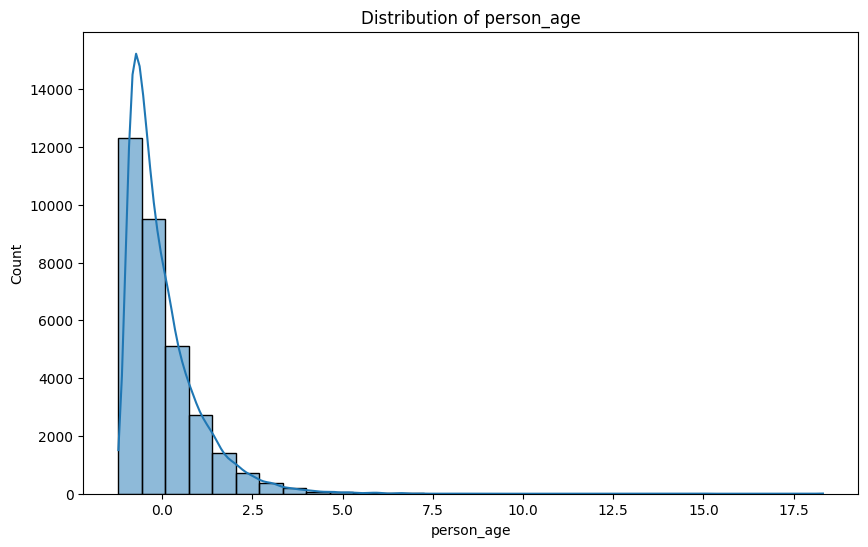

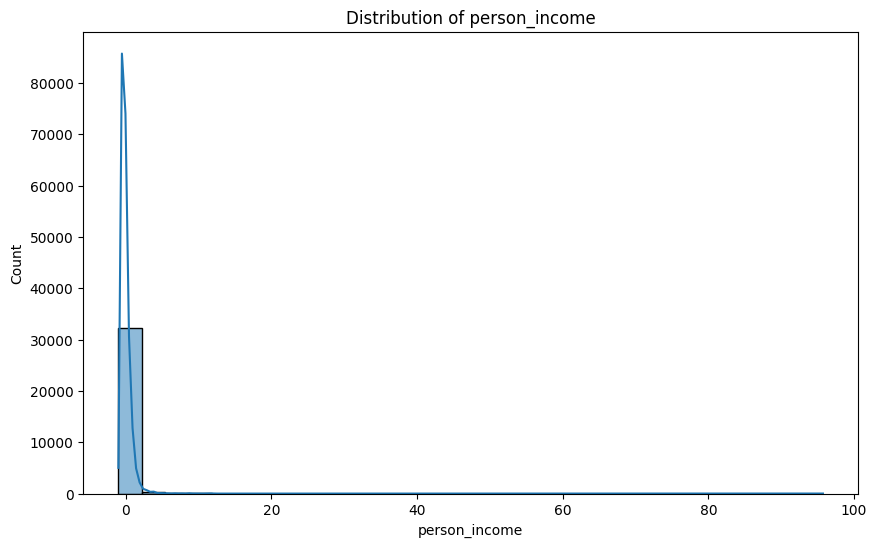

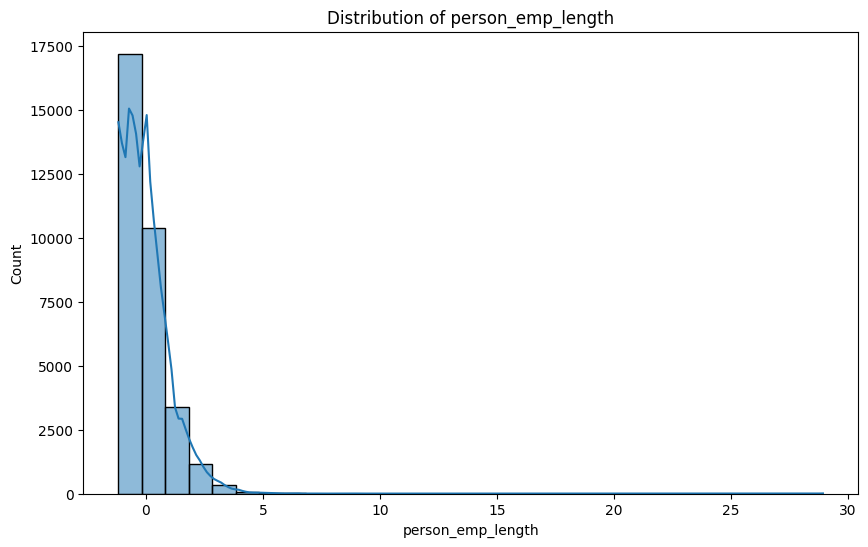

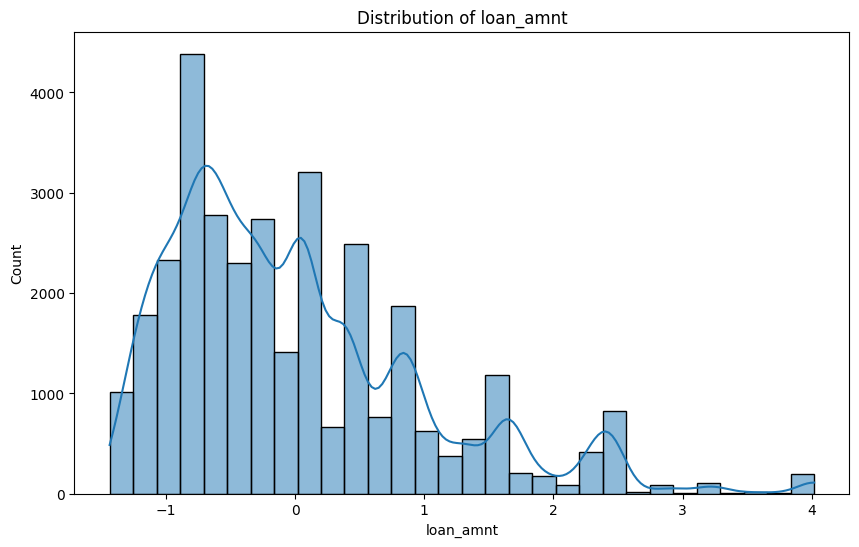

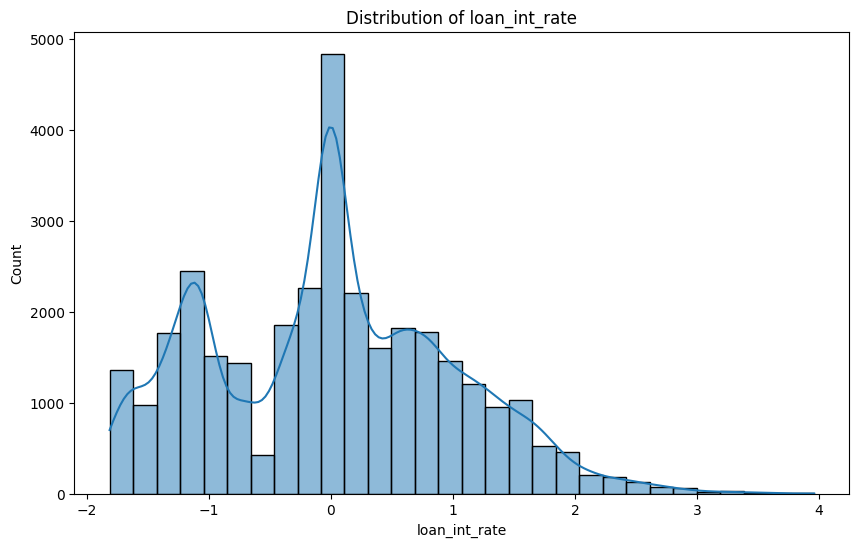

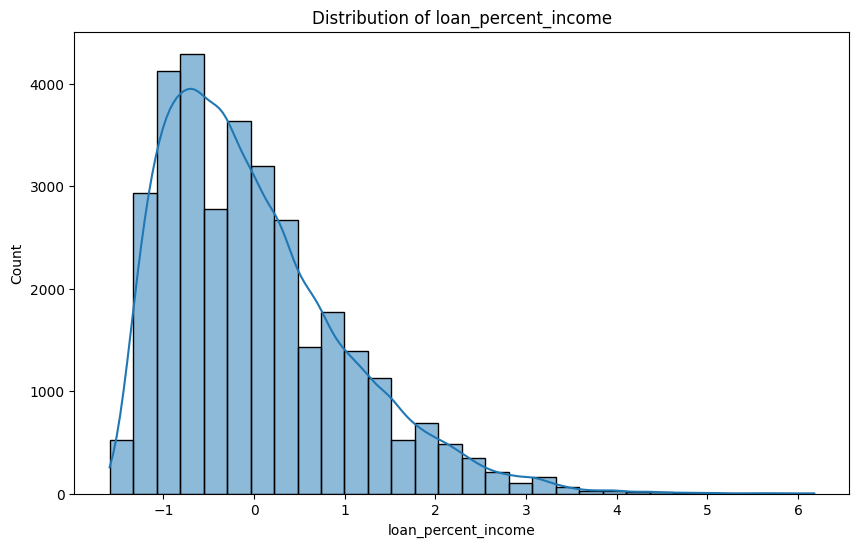

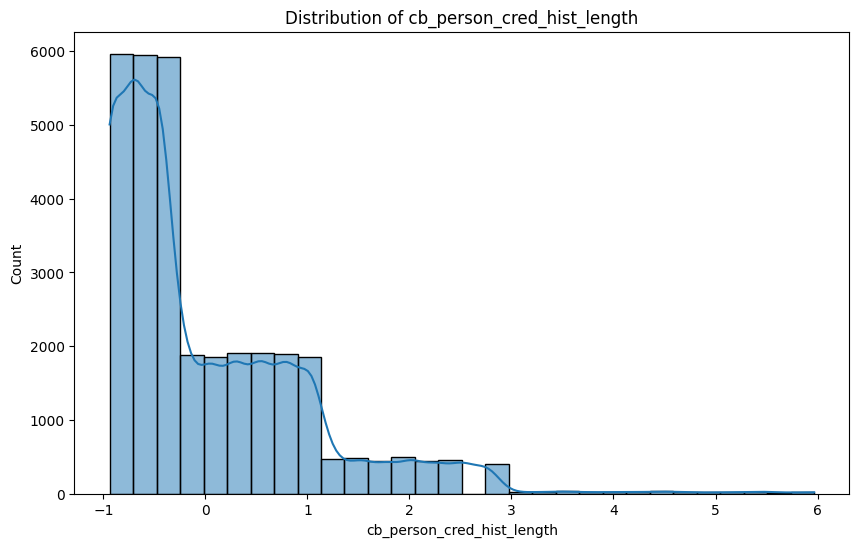

In [ ]:
#Histograms of numerical features to see their distributions
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


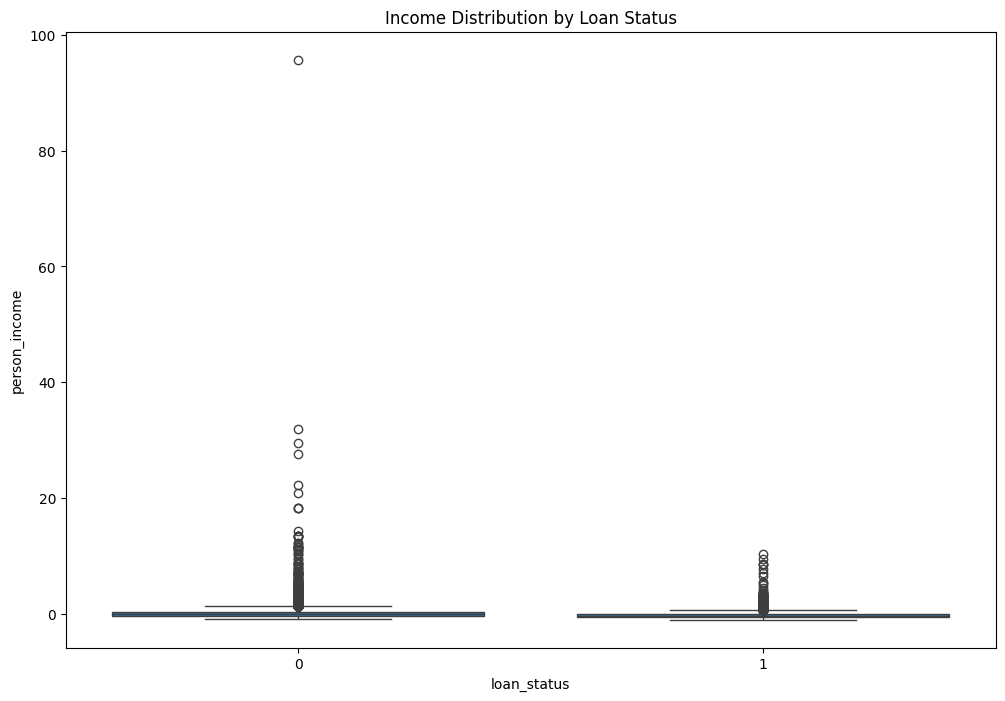

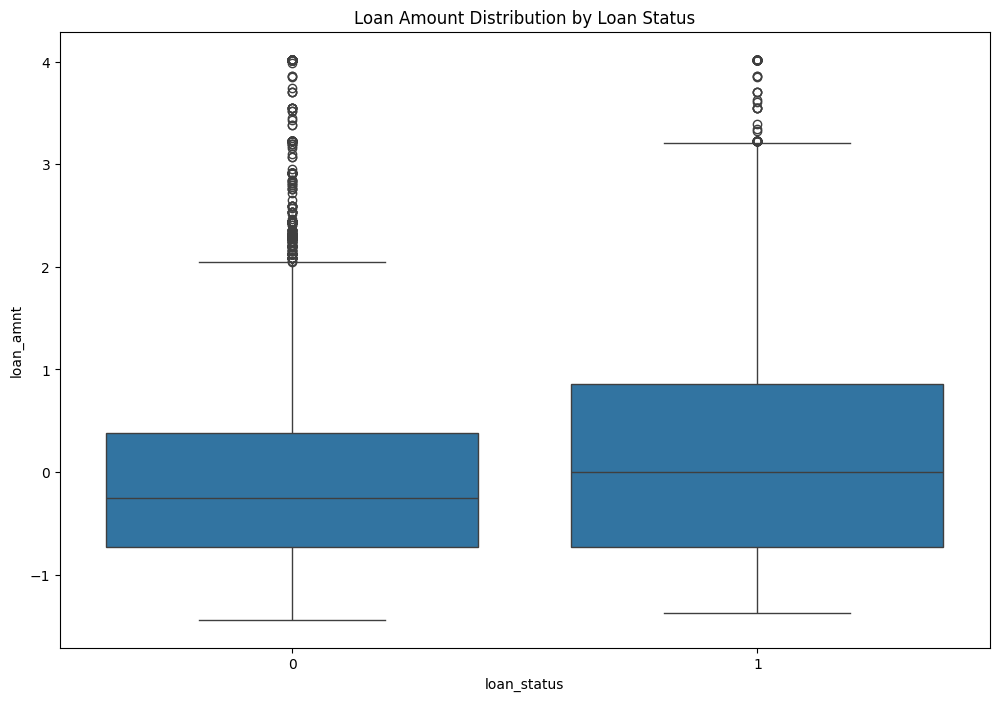

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='person_income', data=data)
plt.title('Income Distribution by Loan Status')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount Distribution by Loan Status')
plt.show()


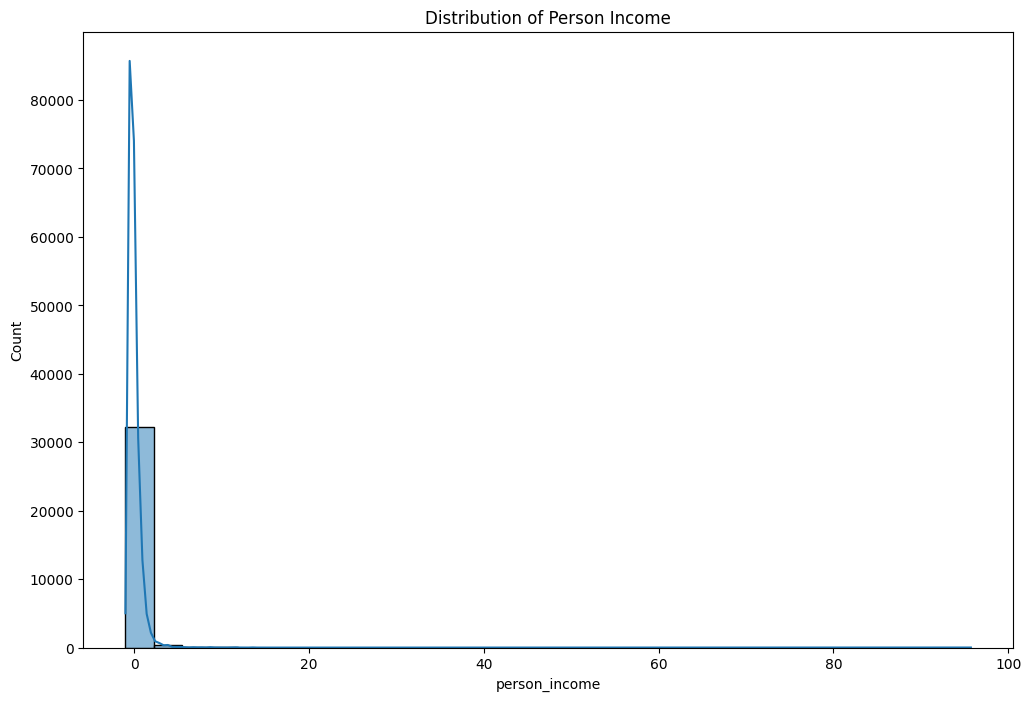

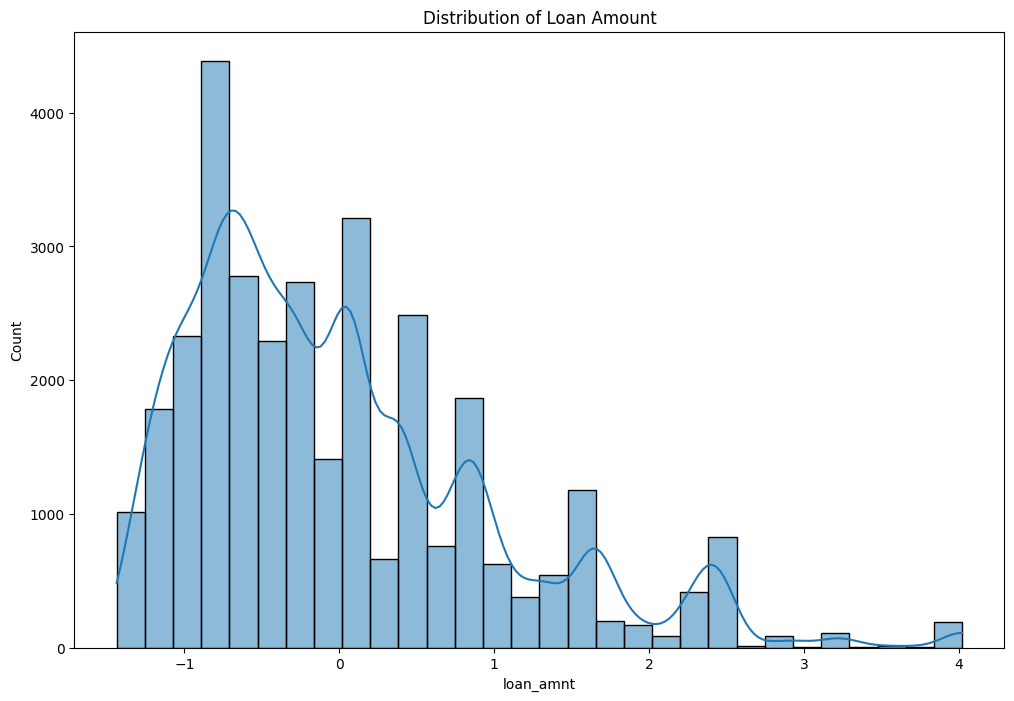

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(data['person_income'], kde=True, bins=30)
plt.title('Distribution of Person Income')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data['loan_amnt'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.show()

In [ ]:
# Split the data into features and labels
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Navie Base Model***

In [ ]:
# Define the model
nb_model = GaussianNB()

In [ ]:
# Define hyperparameters to tune
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'var_smoothing': 0.1873817422860384}


In [ ]:
# Train the model with best parameters
best_nb_model = grid_search.best_estimator_
best_nb_model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.1873817422860384)

In [ ]:
# Cross-validation on training data
cv_scores = cross_val_score(best_nb_model, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std()}")

# Predict on test data
y_pred = best_nb_model.predict(X_test)

Cross-Validation Accuracy Scores: [0.84618335 0.84848485 0.83045646 0.84004603 0.84420568 0.84267076
 0.83844973 0.83077513 0.84151957 0.84343822]
Mean Cross-Validation Accuracy: 0.8406229788682161
Standard Deviation of Cross-Validation Accuracy: 0.005691039516450604


In [ ]:
# Evaluation metrics on test data
print("Test Data Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Data Accuracy: 0.8347399110019947
Confusion Matrix:
 [[4747  325]
 [ 752  693]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5072
           1       0.68      0.48      0.56      1445

    accuracy                           0.83      6517
   macro avg       0.77      0.71      0.73      6517
weighted avg       0.82      0.83      0.82      6517



In [ ]:
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_nb_model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

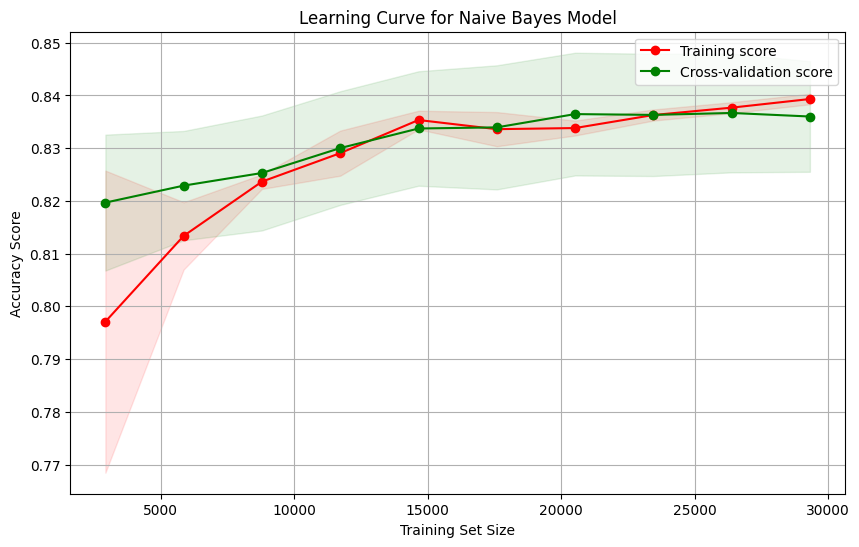

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, validation_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='g')

plt.title('Learning Curve for Naive Bayes Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid()
plt.show()

## ***Decision Tree Model***

# ***ROC Model***

# ***KNN Model***

# ***RandomForest Model***

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Handle missing values
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.92981843575419
Precision: 0.9331880666388157
Recall: 0.92981843575419
F1-Score: 0.9255277054442834
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4443
           1       0.98      0.71      0.82      1285

    accuracy                           0.93      5728
   macro avg       0.95      0.85      0.89      5728
weighted avg       0.93      0.93      0.93      5728



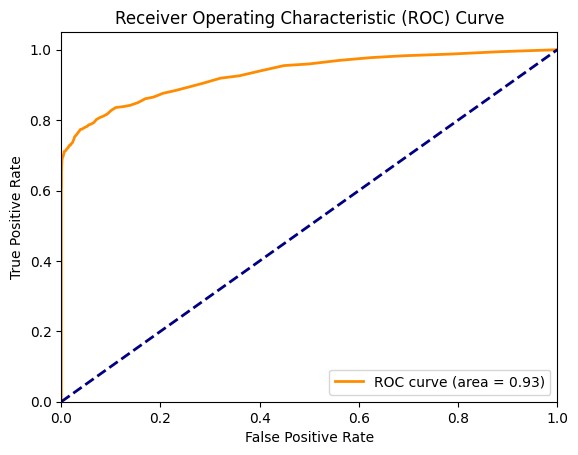

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# ***SVM Model ***